In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available

['fivethirtyeight', 'grayscale', 'ggplot', 'bmh', 'dark_background']

In [2]:
# plt.style.use('ggplot')

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex

from pattrex.demo_helper import read_whdata

# for `whData`

In [3]:
# Read data, remove and save outliers
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hn = HW_new[0, :]
wn = HW_new[1, :]

In [25]:
degree = 3

## Using `sklearn`

In [26]:
# using default initializations
res_sk0 = \
    fit_rex.fit_polynomial_bayesian_skl(hn, wn, degree, padding=50
                                        , X_unknown=hu)
    
coeff_sk0 = res_sk0[0]

line1_sk0 = res_sk0[1][0]
line2_sk0 = res_sk0[1][1]

pred1_sk0 = res_sk0[2][0]
pred2_sk0 = res_sk0[2][1]

pred1w_sk0 = res_sk0[2][0][1]
pred2w_sk0 = res_sk0[2][1][1]

print("Coefficients")
print("\n".join("{}: {}".format(i, c) for i, c in enumerate(coeff_sk0)))
print("\nPredictions")
print("\n".join("{}: {}, {}".format(*p) for p 
                in zip(hu, pred1w_sk0, pred2w_sk0)))

Coefficients
0: -22.424853207869916
1: 1.676277962762623e-07
2: 2.976767457558288e-05
3: 1.7701942030121727e-05

Predictions
168.0: 39.92657938512134, 62.35143259299126
172.0: 46.106380820174024, 68.53123402804394
167.0: 38.426652287777415, 60.85150549564733


## Manual

In [28]:
# using default initializations, sig2=var(y), sig2_0=3.0, mu_0=0
# using inv instead of pinv
# using manual instead of lsmr
res_man0 = \
    fit_rex.fit_polynomial_bayesian(hn, wn, degree
                                        , sig2=None
                                        , mu_0=0, sig2_0=3.0
                                        , padding=50, get_pdf=True
                                        , X_unknown=hu)
    
coeff_man0 = res_man0[0]

line1_man0 = res_man0[1][0]
line2_man0 = res_man0[1][1]

pred1_man0 = res_man0[2][0]
pred2_man0 = res_man0[2][1]

xypdf_man0 = res_man0[3]

pred1w_man0 = res_man0[2][0][1]
pred2w_man0 = res_man0[2][1][1]

print("Coefficients")
print("\n".join("{}: {}".format(i, c) for i, c in enumerate(coeff_man0)))
print("\nPredictions")
print("\n".join("{}: {}, {}".format(*p) for p 
                in zip(hu, pred1w_man0, pred2w_man0)))

Coefficients
0: -0.001589262117356327
1: -0.09352111836597032
2: -0.0010909296320278372
3: 2.295956379280706e-05

Predictions
168.0: 62.362267304805016, 62.36226730406127
172.0: 68.46726260818444, 68.4672626074057
167.0: 60.88876632501493, 60.88876632427979


### Plot

In [ ]:
xx, yy, pdf = xypdf_man0

In [ ]:
plt.contourf(yy, xx, pdf, cmap=plt.cm.PuBu_r)
plt.colorbar()

## Comparing other params

In [29]:
# lsmr
res_man_lsmr = \
    fit_rex.fit_polynomial_bayesian(hn, wn, degree
                                        , sig2=None
                                        , mu_0=0, sig2_0=3.0
                                        , use_lsmr=True, use_pinv=False
                                        , padding=50, get_pdf=True
                                        , X_unknown=hu)
# pinv
res_man_pinv = \
    fit_rex.fit_polynomial_bayesian(hn, wn, degree
                                        , sig2=None
                                        , mu_0=0, sig2_0=3.0
                                        , use_lsmr=False, use_pinv=True
                                        , padding=50, get_pdf=True
                                        , X_unknown=hu)
# lsmr + pinv
res_man_lspin = \
    fit_rex.fit_polynomial_bayesian(hn, wn, degree
                                        , sig2=None
                                        , mu_0=0, sig2_0=3.0
                                        , use_lsmr=True, use_pinv=True
                                        , padding=50, get_pdf=True
                                        , X_unknown=hu)

In [30]:
res_lstsq = fit_rex.fit_polynomial_nplstsq(hn, wn, degree, x_pad=50
                                           , X_unknown=hu)

['skl', 'man', 'man_lsmr', 'man_pinv', 'man_lspin', 'lstsq']
Coefficients
0: -22.4 |-0.00159 |-2.18e-07 |-0.00159 |-2.18e-07 |2.21e+04 |
1: 1.68e-07 |-0.0935 |-2.51e-05 |-0.0935 |-2.51e-05 |-3.85e+02 |
2: 2.98e-05 |-0.00109 |-0.00217 |-0.00109 |-0.00217 | 2.23 |
3: 1.77e-05 |2.3e-05 |2.6e-05 |2.3e-05 |2.6e-05 |-0.00429 |

['skl', 'man', 'man_lsmr', 'man_pinv', 'man_lspin', 'lstsq']
Predictions
168.0: 39.9 62.4|62.4 62.4|62.4 62.4|62.4 62.4|62.4 62.4|60.1 |
172.0: 46.1 68.5|68.5 68.5|68.5 68.4|68.5 68.5|68.5 68.4|68.2 |
167.0: 38.4 60.9|60.9 60.9|60.9 60.9|60.9 60.9|60.9 60.9|58.4 |


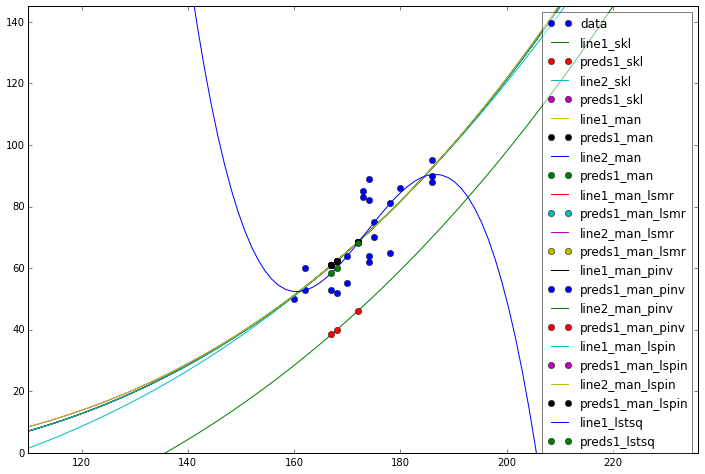

In [33]:
reses = [[res_sk0, "skl"]
        , [res_man0, "man"]
        , [res_man_lsmr, "man_lsmr"]
        , [res_man_pinv, "man_pinv"]
        , [res_man_lspin, "man_lspin"]
        , [res_lstsq, "lstsq"]
        ]

titles = []
coeffs = []
coeff_string = "{}: "
preds = []
preds_string = "{}: "

fig = plt.figure(figsize=(12, 8))
axs = fig.add_subplot(111)

xmin, ymin = HW_new.min(axis=1)
xmax, ymax = HW_new.max(axis=1)

xlim = [xmin-50, xmax+50]
ylim = [ymin-50, ymax+50]

# plot data
plt_rex.plot2d(HW_new, colwise_data=True, hatch='o', 
               x_lim=xlim, y_lim=ylim, 
               show=False, axs=axs, plotlabel="data")

# # plot unkown vertical lines
# for h in hu:
#     axs.axvline(x=h)

for res, label in reses:
    coeff = res[0]
    
    if label != "lstsq":
        line1 = res[1][0]
        line2 = res[1][1]

        pred1 = res[2][0]
        pred2 = res[2][1]

        pred1w = res[2][0][1]
        pred2w = res[2][1][1]

        # formatted printing
        titles.append(label)

        coeffs.append(coeff)
        coeff_string += "{:5.3} |"

        preds.append(pred1w)
        preds.append(pred2w)
        preds_string += "{:4.3} {:4.3}|"
        
    else:
        line1 = res[2]

        pred1 = (hu, res[1])

        pred1w = res[1]

        # formatted printing
        titles.append(label)

        coeffs.append(coeff)
        coeff_string += "{:5.3} |"

        preds.append(pred1w)
        preds_string += "{:4.3} |"
    
    # # PLOTTING ##############################################

    # line 1
    plt_rex.plot2d(np.vstack(line1), colwise_data=True, hatch='-',
                   show=False, axs=axs, plotlabel="line1_"+label)

    # preds 1
    plt_rex.plot2d(np.vstack(pred1), colwise_data=True, hatch='o', 
                   show=False, axs=axs, plotlabel="preds1_"+label)
    
    if label != "lstsq":
        # line 2
        plt_rex.plot2d(np.vstack(line2), colwise_data=True, hatch='-',
                       show=False, axs=axs, plotlabel="line2_"+label)

        # preds 2
        plt_rex.plot2d(np.vstack(pred2), colwise_data=True, hatch='o', 
                       show=False, axs=axs, plotlabel="preds1_"+label)
    

print(titles)
print("Coefficients")
print("\n".join(coeff_string.format(i, *c) for i, c 
                in enumerate(zip(*coeffs))))

print()
print(titles)
print("Predictions")
print("\n".join(preds_string.format(*p) for p 
                in zip(hu, *preds)))
    